<a href="https://colab.research.google.com/github/RicardoSousaPaiva/numericalmethods/blob/main/RicardoHand_On2_CAP418_ParteA2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTITUTO NACIONAL DE PESQUISAS ESPACIAIS<br/>
Métodos numéricos 1<br/>
Professor: Dr. Reinaldo Roberto Rosa<br/>
Aluno: Ricardo Sousa de Paiva <br/>

## CAP418 - HANDS-ON #02 


**Métodos para Encontrar Raízes de Funções Escalares**

================================================================================


CONSIDERE AS SEGUINTES FUNÇÕES ABAIXO:  

$
1) f(x)=x-cos(x)
$

$
2) f(x)=x^{3}-9x+5
$

$
3) f(x)=x(3-x^2)/2 
$

$
4) f(x)=(x^4-10x^2)exp(-x)+1 
$

==========


A) PARA CADA UMA DELAS CONSIDERE O INTERVALO [-1,2] PARA BUSCAR O VALOR DE UMA DETERMINADA RAIZ COM PRECISÃO DE  **10ˆ(-6)** e **50** ITERAÇÕES.

B) APLIQUE EM CADA UMA OS MÉTODOS DE **(I)** *NEWTON-RAPHSON*, **(II)** *SECANTE* E **(III)** *BISSECÇÃO* 

C) PLOTE O VALOR DA RAIZ (X_k) COMO FUNÇÃO DO NÚMERO DE ITERAÇÕES. 
PARA CADA FUNÇÃO PLOTE AS CURVAS DE CADA MÉTODO COM DIFERENTES CORES: I(red), II(green) e III(blue).  
AVALIE QUAL DOS TRÊS MÉTODOS CONVERGE MAIS RAPIDAMENTE EM CADA EXPERIMENTO.

PS: São fornecidos módulos para cada um dos métodos. Entretanto, você pode uniformizar os estilos de input e output para facilitar o hands-on. Isso será levado em conta na avaliação do Hands-On.

================================================================================



### Implementação das Funções de cada **método numérico**:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
%matplotlib inline
import seaborn as sns
import math 
import scipy

In [ ]:
#Método Newton-Raphson
epsilon: 1.0e-6
max_iter:50
def newton(f,Df,x0,epsilon,max_iter):
  global count_RootN
  count_RootN=[]
  global count_IntN
  count_IntN=[]
  count_IntN.append(1)
  global cont_IntN
  xn = x0
  for n in range(0,max_iter):
        fxn = f(xn)
        count_RootN.append(abs(f(xn)))
        IntN= n
        count_IntN.append(IntN)
        if abs(fxn) < epsilon:
          print('Solução encontrada depois de',n,'interações.')
          print('Raiz:', xn)
          return xn, count_RootN,count_IntN
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Derivada zero. Nenhuma raiz encontrada.')
            return None
        xn = xn - fxn/Dfxn
  print('Excedeu o máximo de interações. Nenhuma raiz encontrada.')
  return None
    

In [ ]:
#Método Secante
def secante(f,a,b,max_iter):
  global count_RootS
  count_RootS=[]
  global count_IntS
  count_IntS=[]
  count_IntS.append(1)
  if f(a)*f(b) >= 0:
        print('Nada encontrado!')
        return None
  a_n = a
  b_n = b
  for n in range(1,max_iter+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print('Solução encontrada depois de',n,'interações.')
            print('Raiz', m_n)
            count_RootS.append(abs(f(m_n)))
            IntS= n
            count_IntS.append(IntS)
            return m_n, count_RootS, count_IntS
        else:
            print('Nada encontrado!')
            return None
  return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

In [ ]:
#Método Bissecção
def bisseccao(f,a,b,max_iter):
  global count_RootB
  count_RootB=[]
  global count_IntB
  count_IntB=[]
  count_IntB.append(1)
  if f(a)*f(b) >= 0:
        print('Nada encontrado!')
        return None
  a_n = a
  b_n = b
  for n in range(1,max_iter+1):
    m_n = (a_n + b_n)/2
    f_m_n = f(m_n)
    if f(a_n)*f_m_n < 0:
      a_n = a_n
      b_n = m_n
    elif f(b_n)*f_m_n < 0:
      a_n = m_n
      b_n = b_n
    elif f_m_n == 0:
      print('Solução encontrada depois de', n, 'interações!')
      return m_n,count_RootB,count_IntB
        
    else:
        print('Nada encontrado!')
        return None
  count_RootB.append(abs(f(m_n)))
  IntB= n
  count_IntB.append(IntB)
  return m_n,count_RootB,count_IntB

### Agora, aplicação dos métodos em cada função proposta pelo enunciado.
Chamada das funções:


<h3 align="center"> 1)$ f(x)=x−cos(x) $  </h1>

*   Pelo método **Newton-Raphson**:


In [ ]:
f= lambda x: x - math.cos(x)
df= lambda x: math.sin(x) + 1 
newton(f,df,1,1.0e-6,50)
count_RootN1 = count_RootN
count_IntN1= count_IntN
print(count_RootN1)
print(count_IntN1)

Solução encontrada depois de 3 interações.
Raiz: 0.739085133385284
[0.45969769413186023, 0.018923073822117442, 4.6455898990771516e-05, 2.847205804457076e-10]
[1, 0, 1, 2, 3]


*   Pelo método **Secante:**

In [ ]:
f = lambda x: x - math.cos(x)
secante(f,-1,2,50)
count_RootS1= count_RootS
count_IntS1= count_IntS
print(count_RootS1)
print(count_IntS1)

Solução encontrada depois de 20 interações.
Raiz 0.7390851332151607
[0.0]
[1, 20]


*   Pelo método **Bissecção**:

In [ ]:
f = lambda x: x - math.cos(x)
raiz= bisseccao(f,-1,2,50)
print('Raiz:',raiz)
count_RootB1 = count_RootB
count_IntB1= count_IntB

Raiz: (0.7390851332151618, [1.887379141862766e-15], [1, 50])


Plotando o gráfico da função $ f(x)=x−cos(x) $

No handles with labels found to put in legend.


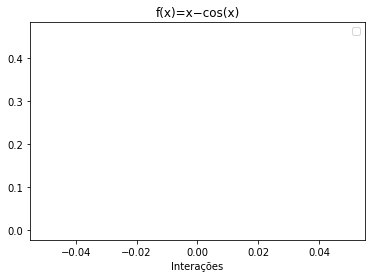

In [ ]:
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()  
x = np.array([count_RootN1])
y= np.array([count_IntN1])
ax.plot(x, label='') 

ax.set_xlabel('Interações')
 
 
ax.set_title("f(x)=x−cos(x)") 
ax.legend()




<h3 align="center"> $ 2) f(x)=x3−9x+5 $  </h1>

*   Pelo método ***Newton-Raphson***:

In [ ]:
f= lambda x: x**3 - 9*x + 5
df= lambda x: 3*x**2 - 9 
newton(f,df,1,1.0e-6,50)

Solução encontrada depois de 4 interações.
Raiz: 0.5768875239163237


(0.5768875239163237,
 [3,
  0.625,
  0.009043604084925327,
  2.2057179300816188e-06,
  1.3145040611561853e-13],
 [1, 0, 1, 2, 3, 4])

*   Pelo método **Secante**:

In [ ]:
f = lambda x: x**3 - 9*x + 5
secante(f,-1,2,50)

0.5768875239163402

*   Pelo método **Bissecção**:

In [ ]:
f = lambda x: x**3 - 9*x + 5
bisseccao(f,-1,2,50)

(0.576887523916338, [1.7763568394002505e-14], [1, 50])

<h3 align="center"> $ 3) f(x)=x(3−x2)/2 $  </h1>

*   Pelo método **Newton-Raphson**:

In [ ]:
f= lambda x: x*(3-x**2)/2
df= lambda x: 3*(1 - x**2)/2
newton(f,df,1,1.0e-6,50)

Derivada zero. Nenhuma raiz encontrada.


*   Pelo método **Secante**:

In [ ]:
f = lambda x: x*(3-x**2)/2
secante(f,-1,2,50)

Nada encontrado!


*   Pelo método **Bissecção**:

In [ ]:
f = lambda x: x*(3-x**2)/2
bisseccao(f,-1,2,50)

Nada encontrado!



<h3 align="center"> $ 4) f(x)=(x4−10x2)exp(−x)+1 $  </h1>

*   Pelo método **Newton-Raphson**:

In [ ]:
f= lambda x: (x**4 - 10*x**2)*math.exp(-x) + 1
df= lambda x: -x*math.exp(-x)*(x**3 - 4*x**2 - 10*x - 20)
newton(f,df,1,1.0e-6,50)

Solução encontrada depois de 47 interações.
Raiz: 2.8100543219084777


(2.8100543219084777,
 [2.310914970542981,
  2.6985398637236715,
  2.8853674684787354,
  2.8368293368690467,
  2.5886661590438087,
  2.2183301107136835,
  1.8066139700478772,
  1.4134918486381198,
  1.0722498621810632,
  0.7945446371383238,
  0.5785372261330084,
  0.4158443070256266,
  0.2960996869768868,
  0.209407859814712,
  0.14737948167382076,
  0.10336708677417783,
  0.07232180318209891,
  0.050514036857772115,
  0.035239786217858615,
  0.02456346291404854,
  0.01711161998196542,
  0.011915572983927536,
  0.00829497077668706,
  0.005773358136783813,
  0.00401774205600236,
  0.0027957206581528116,
  0.0019452543180484838,
  0.0013534391701708337,
  0.0009416445508045879,
  0.0006551269192849318,
  0.00045578189321671125,
  0.0003170910199470356,
  0.00022060101913545793,
  0.00015347187103476045,
  0.00010676980812474035,
  7.427916694213721e-05,
  5.1675514896931674e-05,
  3.5950262226913665e-05,
  2.5010302116434957e-05,
  1.739945129464182e-05,
  1.2104643021926265e-05,
  8.4210

*   Pelo método **Secante**:

In [ ]:
f = lambda x: (x**4 - 10*x**2)*math.exp(-x) + 1
secante(f,-1,2,50)

Nada encontrado!


*   Pelo método **Bissecção**:

In [ ]:
f = lambda x: (x**4 - 10*x**2)*math.exp(-x) + 1
bisseccao(f,-1,2,50)

Nada encontrado!


<h3 align="center"> $ 5) 4πx-400x^-2 $  </h1>

*   Pelo método **Newton-Raphson**:


In [ ]:
f= lambda x: 4 * 3.14 * x ** -2 
df= lambda x: -x*math.exp(-x)*(x**3 - 4*x**2 - 10*x - 20)
newton(f,df,1,1.0e-6,50)

Solução encontrada depois de 2 interações.
Raiz: 14906.749547522448


(14906.749547522448,
 [12.56, 10494.809517865522, 5.6522808091172775e-08],
 [1, 0, 1, 2])

*   Pelo método **Secante**:

In [ ]:
f = lambda x: 4 * 3.14 * x ** -2
secante(f,-1,2,50)

Nada encontrado!


*   Pelo método **Bissecção**:

In [ ]:
f = lambda x: 4 * 3.14 * x ** -2
bisseccao(f,-1,2,50)

Nada encontrado!
